# Load the Dataset & Handle Missing Values

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

input_df = pd.read_csv('train.csv')

input_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To deal with the missing values:

- Age: Replace with the median value
- Embarked: Replace with the mode

In [44]:
imputedvalues_df = input_df.copy()

imputedvalues_df['Age'] = imputedvalues_df['Age'].fillna(imputedvalues_df['Age'].median())
imputedvalues_df['Embarked'] = imputedvalues_df['Embarked'].fillna(imputedvalues_df['Embarked'].mode()[0])

# Seaborn Plots

## Bar Plot

Visualising the survival rate by passenger class

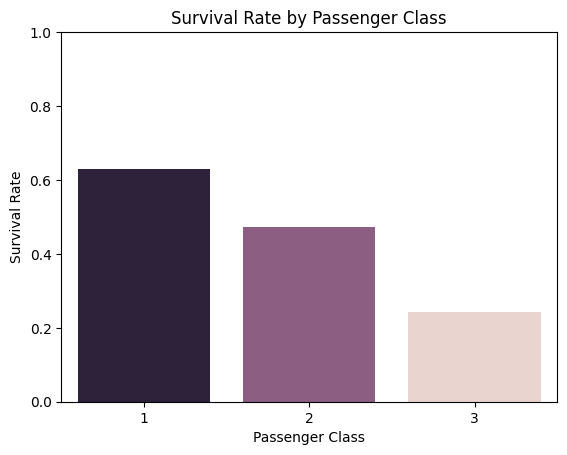

In [45]:

survival_rate_by_pclass = imputedvalues_df.groupby('Pclass')['Survived'].mean().reset_index()


sns.barplot(data=survival_rate_by_pclass, x='Pclass', y='Survived', hue='Survived', legend=False).set(
    title='Survival Rate by Passenger Class',
    xlabel='Passenger Class',
    ylabel='Survival Rate',
)
plt.ylim(0, 1)
plt.show()


## Count Plot

Visualising the survival rate by Sex and Survived

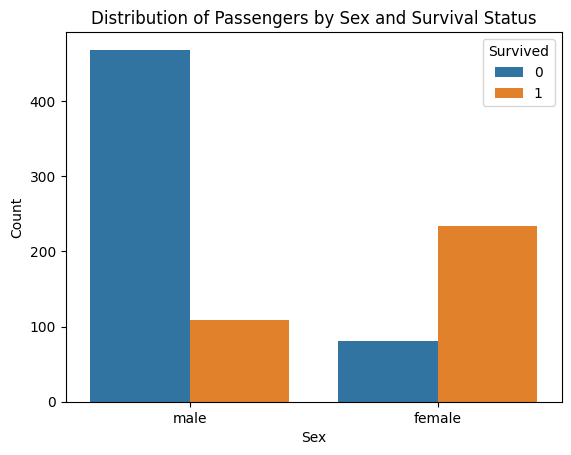

In [46]:
sns.countplot(data=imputedvalues_df, x='Sex', hue='Survived').set(
    title = 'Distribution of Passengers by Sex and Survival Status',
    xlabel = 'Sex',
    ylabel = 'Count'

)
plt.show()

## Histogram

Histogram of ages to see the demographic distribution aboard.

[Text(0.5, 1.0, 'Distribution of Passenger Age')]

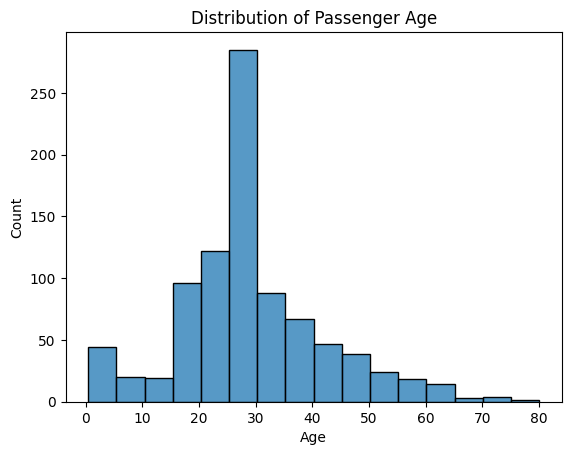

In [47]:
sns.histplot(
    x="Age", 
    data= imputedvalues_df,
    binwidth=5,
    ).set(
    
        title='Distribution of Passenger Age'
    )

Survivors & Non Survivors by Age

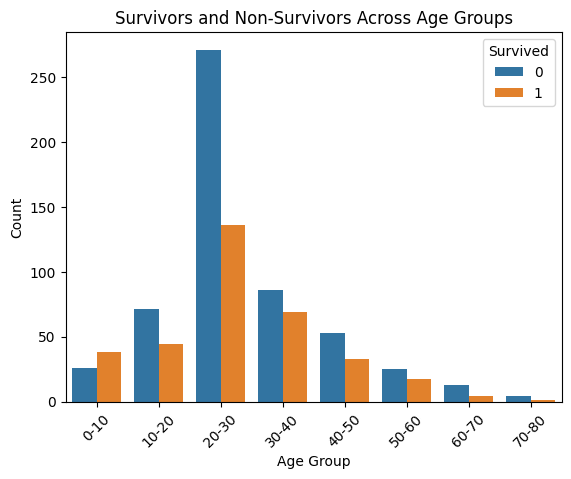

In [55]:

hist_plot_df = imputedvalues_df.copy()

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
hist_plot_df['Age'] = pd.cut(hist_plot_df['Age'], bins=bins, labels=labels)

sns.countplot(data=hist_plot_df, x='Age', hue='Survived').set(
    xlabel = 'Age Group',
    ylabel = 'Count',
    title = 'Survivors and Non-Survivors Across Age Groups'
)
plt.xticks(rotation=45)
plt.show()

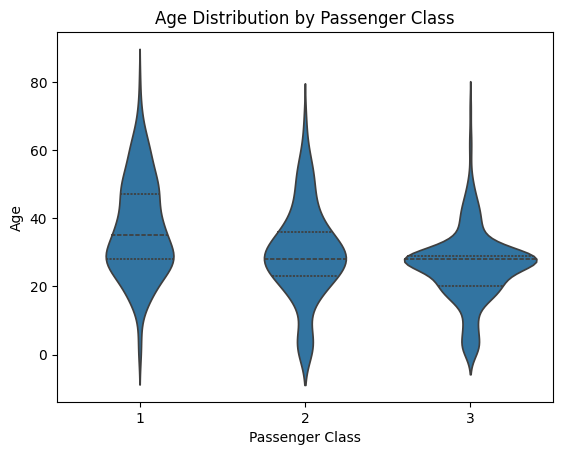

In [58]:
sns.violinplot(x='Pclass', y='Age', data=imputedvalues_df, inner='quartile').set(
    title = 'Age Distribution by Passenger Class',
    xlabel = 'Passenger Class',
    ylabel = 'Age'
)

plt.show()